In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
import zipfile
import csv
import numpy as np
import tensorflow as tf
from tensorflow import keras


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:


local_zip = '/content/gdrive/My Drive/Kannada-MNIST.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:

pixels = []
labels = []
with open("/tmp/train.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        pixel = row[1:]
        pixels.append(pixel)

In [ ]:
np.array(pixels).shape

(60000, 784)

In [ ]:
pixel2D = []
for pixel in pixels:
  pixel = np.array(pixel).reshape(28,28)
  pixel2D.append(pixel)

In [ ]:
x = np.expand_dims(labels,axis = -1)

print(np.array(pixels).shape)
z = np.concatenate((x,np.array(pixels)),axis = 1)
np.array(z).shape

(60000, 784)


(60000, 785)

In [ ]:
x.shape

(1, 60000)

In [ ]:
z = z.astype("int32")

In [ ]:
labels = z[:,0]
pixels = z[:,1:] 


In [ ]:
pixels.shape


(60000, 784)

In [ ]:
pixel2D = []
for pixel in pixels:
  pixel = np.array(pixel).reshape(28,28)
  pixel2D.append(pixel)

In [ ]:
training_images = pixel2D[0:55000]
training_labels = labels[0:55000]
validation_images = pixel2D[55000:]
validation_labels = labels[55000:]

In [ ]:
"""training_labels = np.array(training_labels)
validation_labels = np.array(validation_labels)"""

In [ ]:
"""training_images = np.array(training_images)
validation_images = np.array(validation_images)"""

In [ ]:
training_images = np.expand_dims(training_images,axis = -1)
validation_images = np.expand_dims(validation_images,axis = -1)

In [ ]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(64,(3,3),activation = "relu",input_shape  = (28,28,1)),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "sigmoid")
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"]
             )

In [ ]:
history = model.fit(training_images,training_labels,epochs = 10,validation_data = [validation_images,validation_labels],shuffle = True,verbose = 1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.0195 - acc: 0.9953 - val_loss: 0.0276 - val_acc: 0.9948
Epoch 2/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.0319 - acc: 0.9935 - val_loss: 0.0322 - val_acc: 0.9940
Epoch 3/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.0257 - acc: 0.9942 - val_loss: 0.0253 - val_acc: 0.9958
Epoch 4/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.0286 - acc: 0.9942 - val_loss: 0.0386 - val_acc: 0.9950
Epoch 5/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.0300 - acc: 0.9931 - val_loss: 0.0638 - val_acc: 0.9920
Epoch 6/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.0269 - acc: 0.9935 - val_loss: 0.0483 - val_acc: 0.9942
Epoch 7/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.0379 - acc: 0.9919 - val_lo

Text(0.5, 1.0, 'Training and validation loss')

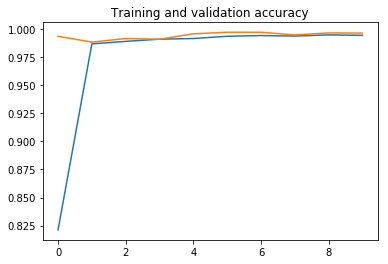

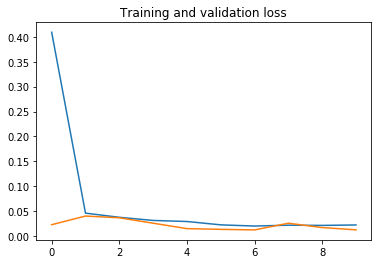

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
import os
import signal
os.kill(os.getpid(),signal.SIGKILL)